import sys
!{sys.executable} -m pip install jupyternotify

In [1]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error as mse,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcol
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import ticker
import warnings
import pickle
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.inspection import partial_dependence
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.svm import SVR
import matplotlib.colors as mcol

import matplotlib.pyplot as plt 
import numpy as np
import os
import json
#from sklearn.inspection import partial_dependence
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Settings

In [3]:
#range of (0,1)
Test_To_All = 0.25
#18 to 23
numTargetCol = 23
#Image DPI
ImageQuality = 240
#Normalization method: -1 for None, 0 for Max-Min Scaling, 1 for Z-Score Scaling
normMethod = 1

In [4]:
startTime = datetime.now()

#Set time
startTime = datetime(year = 2023, month = 12, day = 10, hour = 15, minute = 48, second = 15)

In [5]:
date_time = f'{startTime.strftime("%Y-%m-%d__%H-%M-%S")}'
print(date_time)

2024-02-15__12-16-03


# Import Data 

In [6]:
# แก้ไขชื่อไฟล์ตรงนี้
df_all = pd.read_excel('Dataset/Template.xlsx')

# Nicknaming and abbreviations

In [7]:
# Define the nicknames and abbreviations for each feature
feature_info = {
    'Parent location': {'Nickname': 'Parent Location', 'Abbreviation': 'PL'},
    'Green house gases emissions per capita (tonnes CO2e) (2012)': {'Nickname': 'GHG Emissions', 'Abbreviation': 'GHG'},
    'Obesity rate of adult (2016)': {'Nickname': 'Obesity Rate', 'Abbreviation': 'Obesity'},
    'Pm2.5ug/m3 (2019)': {'Nickname': 'PM2.5', 'Abbreviation': 'PM'},
    'Mean BMI 18+years (2016)': {'Nickname': 'Mean BMI', 'Abbreviation': 'BMI'},
    'life expectancy at birth (2019)': {'Nickname': 'Life Expectancy', 'Abbreviation': 'LE'},
    'Daily smoking prevalence (2012)': {'Nickname': 'Smoking Prevalence', 'Abbreviation': 'Smoking'},
    'Vegetable consumption-per-capita (2019)': {'Nickname': 'Vegetable Consumption', 'Abbreviation': 'Veg'},
    'Poultry kgpercapita(2019)': {'Nickname': 'Poultry Consumption', 'Abbreviation': 'Poultry'},
    'Beef kgpercapit(2019)': {'Nickname': 'Beef Consumption', 'Abbreviation': 'Beef'},
    'Sheep & goat Kgpercapita(2019)': {'Nickname': 'Sheep & Goat Consumption', 'Abbreviation': 'SG'},
    'Pig Kgpercapita(2019)': {'Nickname': 'Pig Consumption', 'Abbreviation': 'Pig'},
    'Other meat Kgpercapita(2019)': {'Nickname': 'Other Meat Consumption', 'Abbreviation': 'OM'},
    'Fish & seafood Kgpercapita (2019)': {'Nickname': 'Fish & Seafood Consumption', 'Abbreviation': 'Fish'},
    'Fruit Kgpercapita (2019)': {'Nickname': 'Fruit Consumption', 'Abbreviation': 'Fruit'},
    'Median age (2019)': {'Nickname': 'Median Age', 'Abbreviation': 'Age'},
    'Share without improved water (2019)': {'Nickname': 'Share without Improved Water', 'Abbreviation': 'SWIW'},
    'Alcohol consumption per capita (liters of pure alcohol) (15+ years of age) (2018)': {'Nickname': 'Alcohol Consumption', 'Abbreviation': 'Alcohol'},
    'Colorectal ASR Incidence (2020)': {'Nickname': 'Colorectal Incidence', 'Abbreviation': 'CI'},
    'Colorectal ASR Mortality (2020)': {'Nickname': 'Colorectal Mortality', 'Abbreviation': 'CM'},
    'Colorectum Estimated number of prevalent cases (1-year) as a proportion in 2020': {'Nickname': 'Colorectal Prevalent Cases', 'Abbreviation': 'CPC'},
    'Lung cancer ASR Mortality(2022)': {'Nickname': 'Lung Cancer Mortality', 'Abbreviation': 'LCM'},
    'Lung cancer ASR Incidence (2022)': {'Nickname': 'Lung Cancer Incidence', 'Abbreviation': 'LCI'},
    'Lung Estimated number of prevalent cases (1-year) as a proportion (2020)': {'Nickname': 'Lung Prevalent Cases', 'Abbreviation': 'LPC'}
}

# Get the column names from the DataFrame
columnss = df_all.columns

# Create a DataFrame to store the results
result_df = pd.DataFrame(index=columnss)

# Map column names to nicknames and abbreviations
result_df['Original Name'] = columnss
result_df['Nickname'] = columnss.map(lambda col: feature_info.get(col, {}).get('Nickname', col))
result_df['Abbreviation'] = columnss.map(lambda col: feature_info.get(col, {}).get('Abbreviation', col))

# Create a reverse mapping from Nickname to Original Name
#nickname_to_original = {value['Nickname']: key for key, value in feature_info.items()}

In [8]:
def getnick(feature_name):
    # Get the nickname for the feature
    nickname = feature_info.get(feature_name, {}).get('Nickname', feature_name)
        #Example feature name
        #feature_name = df_all.columns[17]
        #feature_name = "Green house gases emissions per capita (tonnes CO2e) (2012)"
    return nickname

In [9]:
def getab(feature_name):
    # Get the abbreviation for the feature
    abbreviation = feature_info.get(feature_name, {}).get('Abbreviation', feature_name)
        #Example feature name
        #feature_name = df_all.columns[17]
        #feature_name = "Green house gases emissions per capita (tonnes CO2e) (2012)"
    return abbreviation

In [10]:
# Example feature name
feature_name = "Green house gases emissions per capita (tonnes CO2e) (2012)"

# Get the nickname for the feature
nickname = feature_info.get(feature_name, {}).get('Nickname', feature_name)

# Print the nickname
print("Nickname:", nickname)


# Example feature name
feature_name = df_all.columns[17]

# Get the nickname for the feature
nickname = feature_info.get(feature_name, {}).get('Nickname', feature_name)

# Print the nickname
print("Nickname:", nickname)


Nickname: GHG Emissions
Nickname: Alcohol Consumption


In [11]:
getnick(df_all.columns[16])

'Share without Improved Water'

In [12]:
getab(df_all.columns[16])

'SWIW'

%%timeit -n 10

for qwerty in range(10):
    # Execute the cells below this cell
    pass

In [13]:
kTargetCol = df_all.columns[numTargetCol]

# Sanitize the column name to make it valid for a folder name

In [14]:

# You can remove spaces and replace special characters with underscores
#finTargetCol = kTargetCol.replace(' ', '_').replace('/', '_').replace(':', '_')
finTargetCol = kTargetCol.replace('/', '_').replace(':', '_')

In [15]:
print("Target name: ", kTargetCol)

Target name:  Lung Estimated number of prevalent cases (1-year) as a proportion (2020)


In [16]:
print("Sanitized Target name: ", finTargetCol)

Sanitized Target name:  Lung Estimated number of prevalent cases (1-year) as a proportion (2020)


# Automatically remove rows with #N/A and unwanted columns

In [17]:
# columns_to_exclude_indices = list(range(18, 24))
column_to_keep = kTargetCol  # Replace with the name of the column you want to keep
columns_to_exclude_indices = list(range(18, 24))

# Create a new DataFrame with the specified columns excluded
df = df_all.drop(df_all.columns[columns_to_exclude_indices], axis=1)

# If you want to keep a specific column, add it back to the DataFrame
if column_to_keep in df_all.columns:
    df[column_to_keep] = df_all[column_to_keep]

#Remove rows with #N/A
df = df[df.apply(lambda row: not any(row.isna() | (row == '#N/A').values), axis=1)]

In [18]:
df_all.head()

,Parent location,Green house gases emissions per capita (tonnes CO2e) (2012),Obesity rate of adult (2016),Pm2.5ug/m3 (2019),Mean BMI 18+years (2016),life expectancy at birth (2019),Daily smoking prevalence (2012),Vegetable consumption-per-capita (2019),Poultry kgpercapita(2019),Beef kgpercapit(2019),...,Fruit Kgpercapita (2019),Median age (2019),Share without improved water (2019),Alcohol consumption per capita (liters of pure alcohol) (15+ years of age) (2018),Colorectal ASR Incidence (2020),Colorectal ASR Mortality (2020),Colorectum Estimated number of prevalent cases (1-year) as a proportion in 2020,Lung cancer ASR Mortality(2022),Lung cancer ASR Incidence (2022),Lung Estimated number of prevalent cases (1-year) as a proportion (2020)
0,3,0.59,0.055,62.49,23.4,63.21,11.900000,61.94331,1.812975,2.749679,...,38.626440,16.3,25.65,0.21,5.7,3.8,1.3,7.5,8.1,2.00
1,4,3.07,0.217,16.28,26.7,78.00,20.500000,331.17892,12.259946,13.232321,...,186.786240,36.5,3.03,7.17,7.7,3.8,10.1,17.6,21.1,19.20
2,1,4.70,0.274,22.68,25.5,77.13,11.200000,207.92915,6.563000,4.889485,...,108.334870,27.4,0.74,0.95,15.3,8.3,10.6,10.4,11.5,5.30
3,1,1.66,0.082,27.16,23.3,63.06,8.700000,22.87035,9.698996,4.101908,...,69.073380,16.1,33.83,6.94,7.2,5.2,1.6,2.9,3.1,0.61
4,4,4.27,0.202,34.13,26.3,76.03,26.700001,227.87470,19.525227,25.491850,...,113.030304,33.7,0.03,5.55,20.1,11.3,23.5,25.5,27.8,21.50


In [19]:
df.head()

,Parent location,Green house gases emissions per capita (tonnes CO2e) (2012),Obesity rate of adult (2016),Pm2.5ug/m3 (2019),Mean BMI 18+years (2016),life expectancy at birth (2019),Daily smoking prevalence (2012),Vegetable consumption-per-capita (2019),Poultry kgpercapita(2019),Beef kgpercapit(2019),Sheep & goat Kgpercapita(2019),Pig Kgpercapita(2019),Other meat Kgpercapita(2019),Fish & seafood Kgpercapita (2019),Fruit Kgpercapita (2019),Median age (2019),Share without improved water (2019),Alcohol consumption per capita (liters of pure alcohol) (15+ years of age) (2018),Lung Estimated number of prevalent cases (1-year) as a proportion (2020)
0,3,0.59,0.055,62.49,23.4,63.21,11.900000,61.94331,1.812975,2.749679,3.454725,0.010072,0.312235,0.372667,38.626440,16.3,25.65,0.21,2.00
1,4,3.07,0.217,16.28,26.7,78.00,20.500000,331.17892,12.259946,13.232321,8.711278,6.415671,0.561371,8.661156,186.786240,36.5,3.03,7.17,19.20
2,1,4.70,0.274,22.68,25.5,77.13,11.200000,207.92915,6.563000,4.889485,8.135700,0.020163,0.342768,3.881344,108.334870,27.4,0.74,0.95,5.30
3,1,1.66,0.082,27.16,23.3,63.06,8.700000,22.87035,9.698996,4.101908,0.796774,7.593940,0.314775,14.361596,69.073380,16.1,33.83,6.94,0.61
4,4,4.27,0.202,34.13,26.3,76.03,26.700001,227.87470,19.525227,25.491850,3.355571,9.395597,0.083889,5.756901,113.030304,33.7,0.03,5.55,21.50


In [20]:
#folder_name = f"{finTargetCol}_{date_time}"
folder_name = f"{finTargetCol}"

# Specify the directory where you want to create the folder
directory = './'  # This will create the folder in the current working directory

# Create the folder
folder_path = os.path.join(directory, folder_name)
os.makedirs(folder_path, exist_ok=True)

# Print the path to the created folder
print("Folder created with the name:", folder_name)
print("Folder path:", folder_path)

# Create the subfolder
subfolder_path = os.path.join(folder_path, date_time)
os.makedirs(subfolder_path, exist_ok=True)

print("Subfolder created with the name:", date_time)
print("Subfolder path:", subfolder_path)

Folder created with the name: Lung Estimated number of prevalent cases (1-year) as a proportion (2020)
Folder path: ./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)
Subfolder created with the name: 2024-02-15__12-16-03
Subfolder path: ./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03


# Making representations of each features (Box plot, S.D., Min, Max, Mean)

#Function to add text annotation with automatic placement to avoid overlaps
def add_text_annotation(ax, x, y, text, color, ha, va):
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
    ax.annotate(text, (x, y), xytext=(0,0), textcoords="offset points", color=color, ha=ha, va=va, bbox=bbox_props)

def add_median_labels(ax: plt.Axes, fmt: str = ".1f") -> None:
    """Add text labels to the median lines of a seaborn boxplot.

    Args:
        ax: plt.Axes, e.g. the return value of sns.boxplot()
        fmt: format string for the median value
    """
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if "Patch" in str(c)]
    start = 4
    if not boxes:  # seaborn v0.13 => fill=False => no patches => +1 line
        boxes = [c for c in ax.get_lines() if len(c.get_xdata()) == 5]
        start += 1
    lines_per_box = len(lines) // len(boxes)
    for median in lines[start::lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if len(set(median.get_xdata())) == 1 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

In [21]:
# Calculate statistics (mean, min, max, standard deviation)
statistics_df = df_all.describe().transpose()
result_df[['Min', 'Max', 'Mean', 'Std']] = statistics_df[['min', 'max', 'mean', 'std']]
result_df['Min-Max'] = statistics_df[['min', 'max']].astype(int).astype(str).agg('-'.join, axis=1)

# Save the result to an Excel file
if not os.path.exists(os.path.join(directory,'feature_summary.xlsx')):
    result_df.to_excel(os.path.join(directory,'feature_summary.xlsx'), index_label='Feature')


In [22]:
import seaborn as sns

output_path = os.path.join(folder_path, "Data Representation 11 final")
os.makedirs(output_path, exist_ok=True)

plot_types = ["Box plots", "Min Max Mean plots", "Strip plots"]
sub_types = ["All", "Categorized by Parent Location"]

for plot_type in plot_types:
        for sub_type in sub_types:
            if not (plot_type == "Min Max Mean plots" and sub_type == "Categorized by Parent Location"):
                os.makedirs(os.path.join(output_path, plot_type, sub_type), exist_ok=True)

plt.tight_layout()

# Loop through each column (feature) in the DataFrame
for column in df.columns:
    # Get nickname and abbreviation for the current column
    nickname = getnick(column)
    abbreviation = getab(column)

    for plot_type in plot_types:
        for sub_type in sub_types:
            if plot_type == "Min Max Mean plots" and sub_type == "Categorized by Parent Location":
                continue
            output_folder = os.path.join(output_path, plot_type, sub_type)
            output_file_path = os.path.join(output_folder, f'{column.replace("/", "_").replace(":", "_")}_{plot_type.lower().replace(" ", "_")}_{sub_type.lower().replace(" ", "_")}.png')

            if not os.path.exists(output_file_path):
                if sub_type == "All":
                    if plot_type == "Box plots":
                        sns.boxplot(x=df[column])


                        plt.text(df[column].min(),-0.2, f'Min: {df[column].min():.2f}', color='#FFA500', ha='left', va='bottom')
                        plt.text(df[column].max(),0.2, f'Max: {df[column].max():.2f}', color='m', ha='left', va='bottom')
                        plt.text(df[column].quantile(0.50),0, f'Q2: {df[column].quantile(0.50):.2f}', color='r', ha='left', va='bottom')
                        plt.text(df[column].quantile(0.25),-0.1, f'Q1: {df[column].quantile(0.25):.2f}', color='b', ha='left', va='top')
                        plt.text(df[column].quantile(0.75),0.1, f'Q3: {df[column].quantile(0.75):.2f}', color='g', ha='left', va='top')
                        
                    elif plot_type == "Strip plots":
                        sns.stripplot(x=df[column])
                        
                    elif plot_type == "Min Max Mean plots" :
                        
                        sns.histplot(df[column], kde=True)
                        
                        # Add axvlines with labels
                        plt.axvline(df[column].min(), color='#FFA500', linestyle='dashed', linewidth=2, label='Min')
                        plt.text(df[column].min(), plt.ylim()[1], f'{df[column].min():.2f}', color='#FFA500', ha='left', va='top')

                        plt.axvline(df[column].max(), color='m', linestyle='dashed', linewidth=2, label='Max')
                        plt.text(df[column].max(), plt.ylim()[1], f'{df[column].max():.2f}', color='m', ha='left', va='top')

                        plt.axvline(df[column].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
                        plt.text(df[column].mean(), plt.ylim()[1], f'{df[column].mean():.2f}', color='r', ha='left', va='top')

                        plt.axvline(df[column].mean() + df[column].std(), color='g', linestyle='dashed', linewidth=2, label='Mean + SD')
                        plt.text(df[column].mean() + df[column].std(), plt.ylim()[1], f'{df[column].mean() + df[column].std():.2f}', color='g', ha='left', va='top')

                        plt.axvline(df[column].mean() - df[column].std(), color='g', linestyle='dashed', linewidth=2, label='Mean - SD')
                        plt.text(df[column].mean() - df[column].std(), plt.ylim()[1], f'{df[column].mean() - df[column].std():.2f}', color='g', ha='left', va='top')

                        plt.legend()
                        
                        
                        
                        
                        
                elif sub_type == "Categorized by Parent Location" and column != df.columns[0]:
                    if plot_type == "Box plots":
                        ax = sns.boxplot(x=df.columns[0], y=column, data=df)
                        #add_median_labels(ax)
                        
                        """
                        # Add annotations for min, max, and quartiles for each box
                        for i in range(0,6):
                            box_min = df.groupby(df.columns[0])[column].min().values[i]
                            box_max = df.groupby(df.columns[0])[column].max().values[i]
                            box_q1 = df.groupby(df.columns[0])[column].quantile(0.25).values[i]
                            box_q2 = df.groupby(df.columns[0])[column].quantile(0.50).values[i]
                            box_q3 = df.groupby(df.columns[0])[column].quantile(0.75).values[i]

                            plt.text(i/1, box_min , f'Min: {box_min:.2f}', color='#FFA500', ha='left', va='bottom')
                            plt.text(i/1, box_max, f'Max: {box_max:.2f}', color='m', ha='left', va='bottom')
                            plt.text(i/1, box_q2, f'Q2: {box_q2:.2f}', color='r', ha='left', va='bottom')
                            plt.text(i/1, box_q1, f'Q1: {box_q1:.2f}', color='b', ha='left', va='top')
                            plt.text(i/1, box_q3, f'Q3: {box_q3:.2f}', color='g', ha='left', va='top')
                        """               


                            
                            
                            
                            

            
                    elif plot_type == "Strip plots":
                        sns.stripplot(x=df.columns[0], y=column, data=df)
                    
                    plt.xlabel("Location Group");  # Add this line to customize the x-axis label
                    
                #plt.ylabel(nickname);  # Add this line to customize the y-axis label
                plt.ylabel(abbreviation);  # Add this line to customize the y-axis label
                
                
                plt.title(f'{plot_type} - {nickname}')
                #plt.title(f'{plot_type} - {abbreviation}')
                plt.savefig(output_file_path, dpi=ImageQuality, bbox_inches='tight')
                
                plt.close()

print("Images saved successfully.")
print("Files saved in " + output_path)


Images saved successfully.
Files saved in ./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\Data Representation 11 final


<Figure size 640x480 with 0 Axes>

import seaborn as sns
output_path = os.path.join(folder_path,"Data Representation")
os.makedirs(output_path, exist_ok=True)

os.makedirs(os.path.join(output_path, "Box plots"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Box plots" , "All"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Box plots" , "Categorized by Parent Location"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Min Max Mean plots"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Strip plots"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Strip plots" , "All"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Strip plots" , "Categorized by Parent Location"), exist_ok=True)
plt.tight_layout()
# Loop through each column (feature) in the DataFrame
for column in df.columns:
    # Box Plot all
    if not os.path.exists(os.path.join(output_path, "Box plots" , "All", f'{column.replace("/", "_").replace(":", "_")}_box_plot.png')):
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot - {column}')
        plt.savefig(os.path.join(output_path, "Box plots" , "All", f'{column.replace("/", "_").replace(":", "_")}_box_plot.png'),dpi=ImageQuality, bbox_inches='tight')
        plt.close()
    
    # Box Plot each parent location
    if column != df.columns[0]:
        if not os.path.exists(os.path.join(output_path, "Box plots" , "Categorized by Parent Location", f'{column.replace("/", "_").replace(":", "_")}_box_plot.png')):
            sns.boxplot(x=df.columns[0], y=column, data=df)
            plt.title(f'Box Plot - {column}')
            plt.savefig(os.path.join(output_path, "Box plots" , "Categorized by Parent Location", f'{column.replace("/", "_").replace(":", "_")}_box_plot.png'),dpi=ImageQuality, bbox_inches='tight')
            plt.close()
    
    # Strip Plot all
    if not os.path.exists(os.path.join(output_path, "Strip plots" , "All", f'{column.replace("/", "_").replace(":", "_")}_strip_plot.png')):
        sns.stripplot(x=df[column])
        plt.title(f'Strip Plot - {column}')
        plt.savefig(os.path.join(output_path, "Strip plots" , "All", f'{column.replace("/", "_").replace(":", "_")}_strip_plot.png'),dpi=ImageQuality, bbox_inches='tight')
        plt.close()
    
    # Strip Plot each parent location
    if column != df.columns[0]:
        if not os.path.exists(os.path.join(output_path, "Strip plots" , "Categorized by Parent Location", f'{column.replace("/", "_").replace(":", "_")}_strip_plot.png')):
            sns.stripplot(x=df.columns[0], y=column, data=df)
            plt.title(f'Strip Plot - {column}')
            plt.savefig(os.path.join(output_path, "Strip plots" , "Categorized by Parent Location", f'{column.replace("/", "_").replace(":", "_")}_strip_plot.png'),dpi=ImageQuality, bbox_inches='tight')
            plt.close()

    # Standard Deviation, Min, Max, Mean
    if not os.path.exists(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_std.png')):
        sns.histplot(df[column], kde=True)
        plt.title(f'Min, Max, Mean, Standard Deviation - {column}')
        plt.axvline(df[column].min(), color='#FFA500', linestyle='dashed', linewidth=2, label='Min')
        plt.axvline(df[column].max(), color='m', linestyle='dashed', linewidth=2, label='Max')
        plt.axvline(df[column].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[column].mean() + df[column].std(), color='g', linestyle='dashed', linewidth=2, label='Mean + SD')
        plt.axvline(df[column].mean() - df[column].std(), color='g', linestyle='dashed', linewidth=2, label='Mean - SD')
        plt.legend()
        plt.savefig(os.path.join(output_path, "Min Max Mean plots", f'{column.replace("/", "_").replace(":", "_")}_min_max_mean_std.png'),dpi=ImageQuality, bbox_inches='tight')
        plt.close()

print("Images saved successfully.")
print("Files saved in " + output_path)


output_path = os.path.join(folder_path,"Data Representation")
os.makedirs(output_path, exist_ok=True)


plt.tight_layout()
# Loop through each column (feature) in the DataFrame
for column in df.columns:
    # Box Plot
    if not os.path.exists(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_box_plot.png')):
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot - {column}')
        plt.savefig(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_box_plot.png'),dpi=ImageQuality, bbox_inches='tight')
        plt.close()

    # Standard Deviation
    if not os.path.exists(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_std.png')):
        sns.histplot(df[column], kde=True)
        plt.title(f'Standard Deviation - {column}')
        plt.axvline(df[column].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[column].mean() + df[column].std(), color='g', linestyle='dashed', linewidth=2, label='Mean + SD')
        plt.axvline(df[column].mean() - df[column].std(), color='g', linestyle='dashed', linewidth=2, label='Mean - SD')
        plt.legend()
        plt.savefig(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_std.png'),dpi=ImageQuality, bbox_inches='tight')
        plt.close()

    # Min, Max, Mean
    if not os.path.exists(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_min_max_mean.png')):
        sns.histplot(df[column], kde=True)
        plt.title(f'Min, Max, Mean - {column}')
        plt.axvline(df[column].min(), color='b', linestyle='dashed', linewidth=2, label='Min')
        plt.axvline(df[column].max(), color='m', linestyle='dashed', linewidth=2, label='Max')
        plt.axvline(df[column].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.legend()
        plt.savefig(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_min_max_mean.png'),dpi=ImageQuality, bbox_inches='tight')
        plt.close()

print("Images saved successfully.")
print("Files saved in " + output_path)


import seaborn as sns

# Set the style of seaborn for better visualization (optional)
sns.set(style="whitegrid")
output_path = os.path.join(folder_path,"Data Representation")
os.makedirs(output_path, exist_ok=True)

# Loop through each feature and create box plots
for column in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Box plot
    sns.boxplot(x=df[column])
    
    # Add standard deviation, minimum, maximum, and mean to the plot
    plt.text(1, df[column].max(), f'Max: {df[column].max():.2f}', ha='right', va='bottom')
    plt.text(1, df[column].min(), f'Min: {df[column].min():.2f}', ha='right', va='top')
    plt.text(1, df[column].mean(), f'Mean: {df[column].mean():.2f}', ha='right', va='center')
    plt.text(1, df[column].std(), f'SD: {df[column].std():.2f}', ha='right', va='center')
    
    plt.title(f'Box Plot with SD, Min, Max, and Mean for {column}')
    
    # Save the plot as an image

    
    if not os.path.exists(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_box_plot.png')):
        # Save the plot as an image
        plt.savefig(os.path.join(output_path, f'{column.replace("/", "_").replace(":", "_")}_box_plot.png'))


    
    # Close the plot to free up resources
    plt.close()

print(f'Box plots saved in {output_path}')

# Normalization

In [23]:
# Create a Scaler
if normMethod == -1:
    normMethodName = "No Scaler"
if normMethod == 0:
    scaler = MinMaxScaler()
    normMethodName = "Min-Max Scaler"
if normMethod == 1:
    scaler = StandardScaler()
    normMethodName = "Standard Scaler"

# Fit and transform the numerical columns
if normMethod != -1:
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now, df contains the normalized data

In [24]:
pd.set_option('display.max_rows', None)

In [25]:
print(df)

     Parent location  \
0          -0.015947   
1           0.602009   
2          -1.251861   
3          -1.251861   
4           0.602009   
5           1.837923   
6           0.602009   
7           0.602009   
8          -0.633904   
9          -0.015947   
10          1.219966   
11         -0.633904   
12          0.602009   
13          0.602009   
14         -0.633904   
15         -1.251861   
16          1.219966   
17         -0.633904   
18          0.602009   
19         -1.251861   
20         -0.633904   
21          0.602009   
22         -1.251861   
23         -1.251861   
24          1.837923   
25         -1.251861   
26         -0.633904   
27         -1.251861   
28         -1.251861   
29         -0.633904   
30          1.837923   
31         -0.633904   
32         -1.251861   
33         -0.633904   
34         -1.251861   
35         -0.633904   
36          0.602009   
37          0.602009   
38         -1.251861   
39          0.602009   
40         -0.01

# Correlation plot

In [26]:
print(df.select_dtypes(['number']).columns)

Index(['Parent location',
       'Green house gases emissions per capita (tonnes CO2e) (2012)',
       'Obesity rate of adult (2016)', 'Pm2.5ug/m3 (2019)',
       'Mean BMI 18+years (2016)', 'life expectancy at birth (2019)',
       'Daily smoking prevalence (2012)',
       'Vegetable consumption-per-capita (2019)', 'Poultry kgpercapita(2019)',
       'Beef kgpercapit(2019)', 'Sheep & goat Kgpercapita(2019)',
       'Pig Kgpercapita(2019)', 'Other meat Kgpercapita(2019)',
       'Fish & seafood Kgpercapita (2019)', 'Fruit Kgpercapita (2019)',
       'Median age (2019)', 'Share without improved water (2019)',
       'Alcohol consumption per capita (liters of pure alcohol) (15+ years of age) (2018)',
       'Lung Estimated number of prevalent cases (1-year) as a proportion (2020)'],
      dtype='object')


In [27]:
print(range(df.select_dtypes(['number']).shape[1]))

range(0, 19)


In [28]:
print([getab(feature) for feature in df.select_dtypes(['number']).columns]
)

['PL', 'GHG', 'Obesity', 'PM', 'BMI', 'LE', 'Smoking', 'Veg', 'Poultry', 'Beef', 'SG', 'Pig', 'OM', 'Fish', 'Fruit', 'Age', 'SWIW', 'Alcohol', 'LPC']


Folder path: ./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\Correlation
Created File:  ./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\Correlation\Correlation_plot__2024-02-15__12-16-03.png


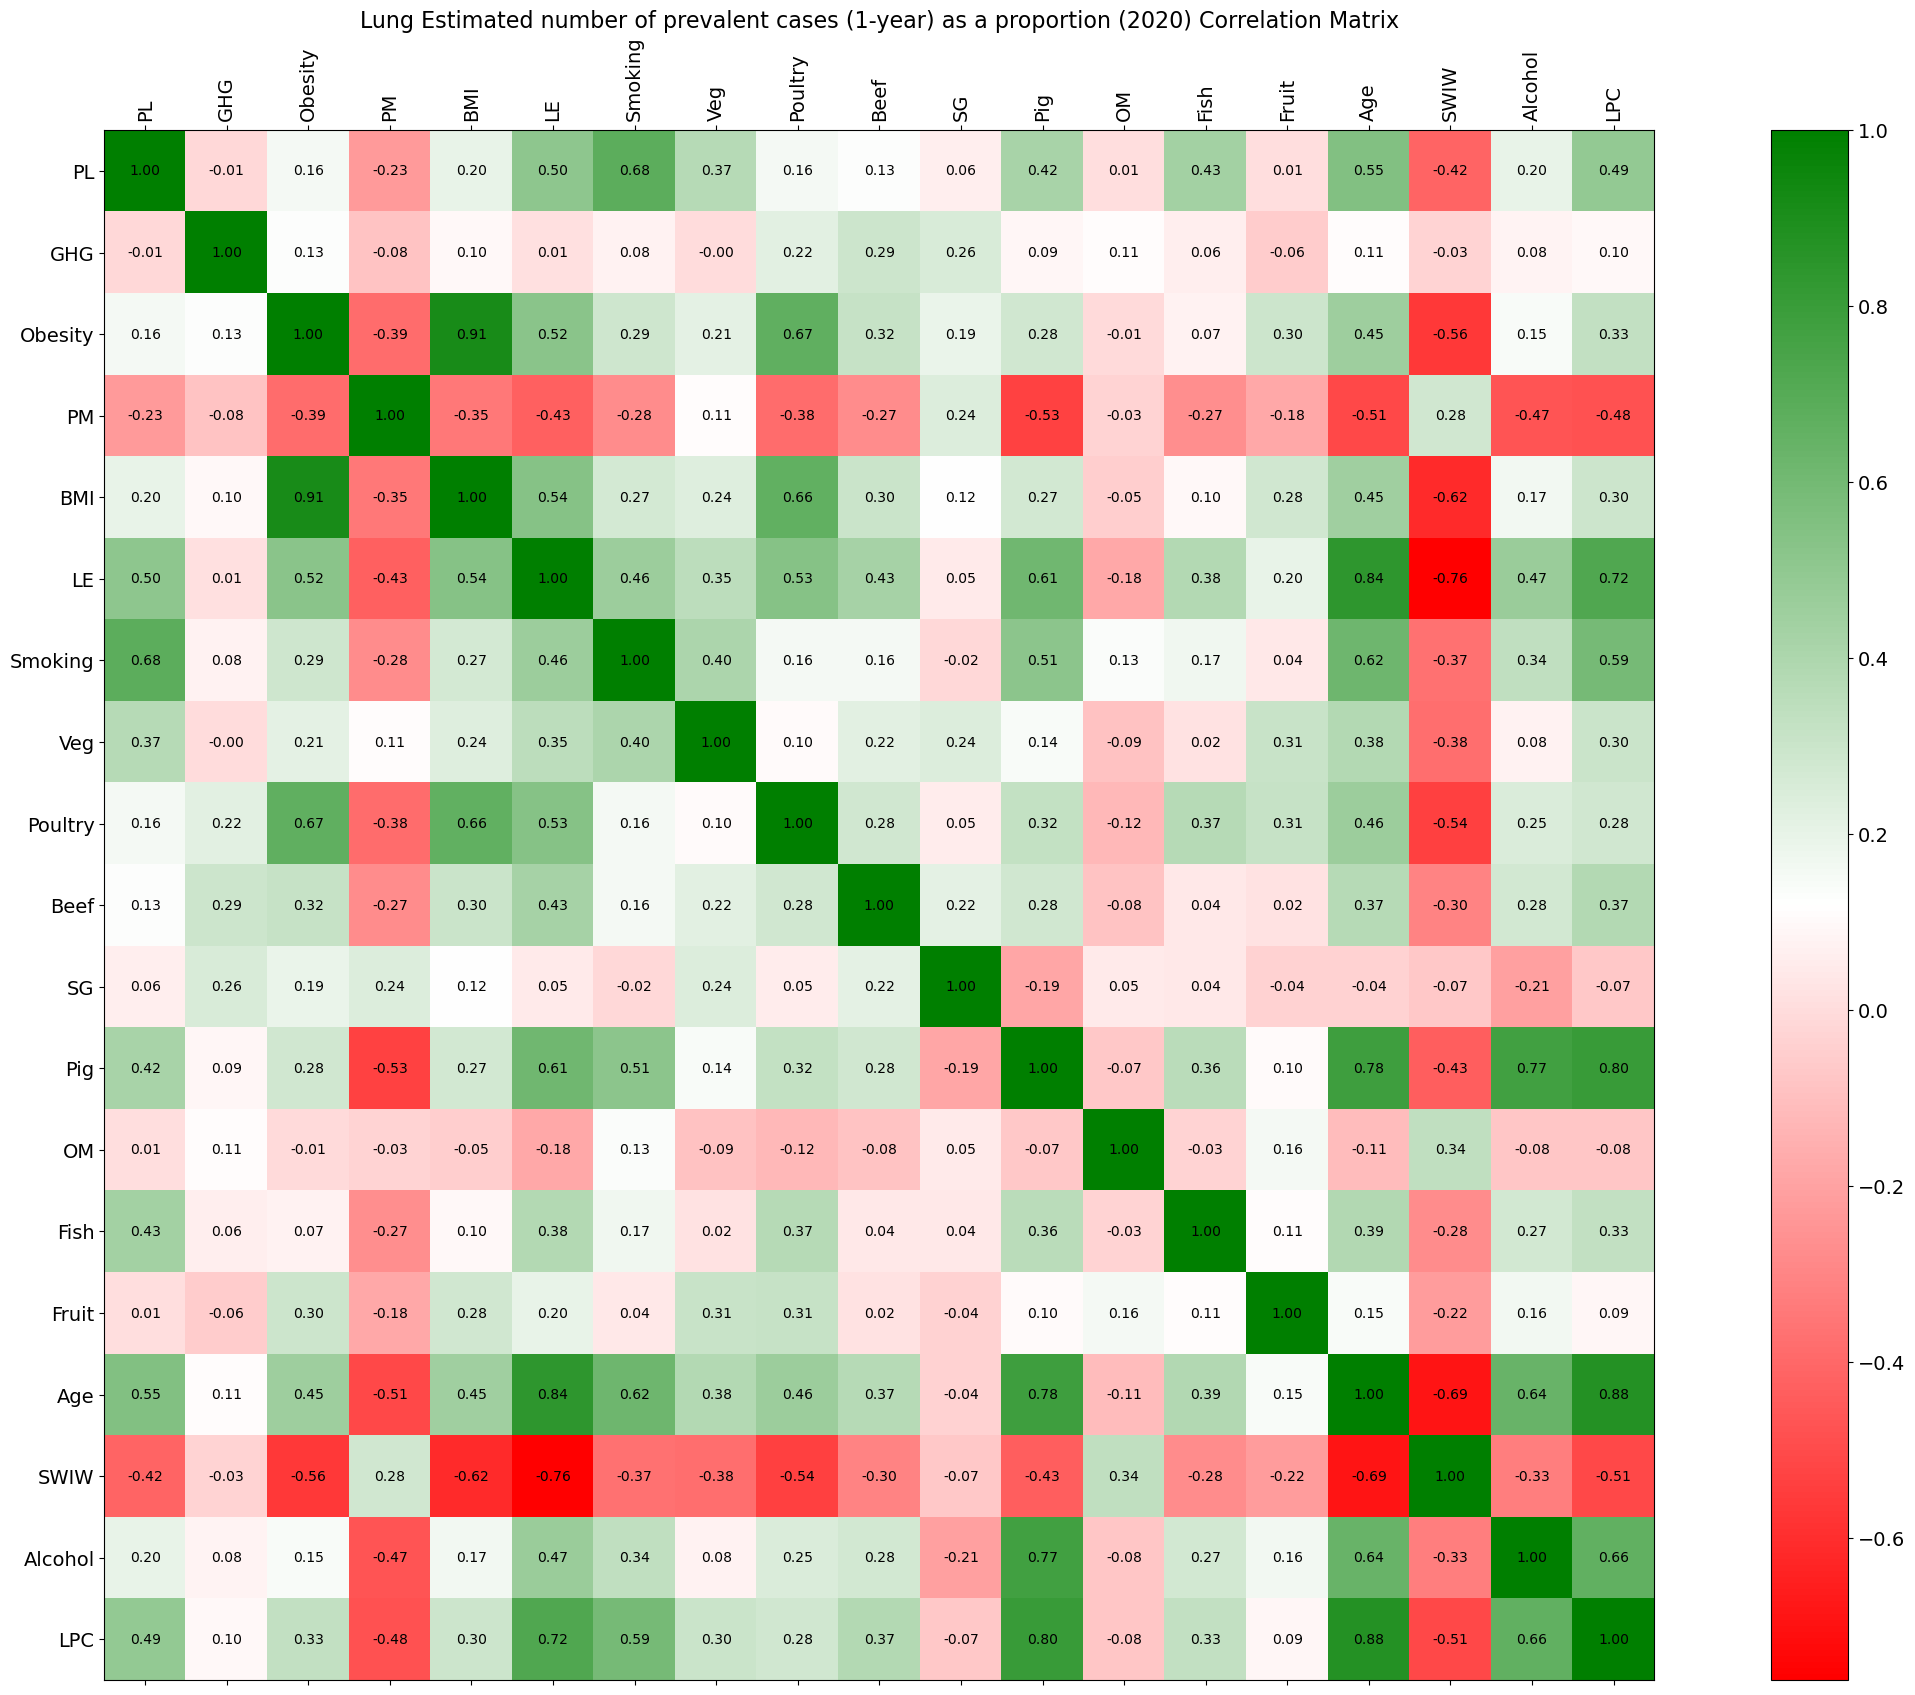

In [29]:

f = plt.figure(figsize=(30, 20))
plt.matshow(df.corr(), fignum=f.number, cmap=mcol.LinearSegmentedColormap.from_list("MyCmapName",["r",'w',"g"]))
plt.grid(False)
for (i, j), z in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',color = 'black')
    
abb = [getab(feature) for feature in df.select_dtypes(['number']).columns]


plt.xticks( range(df.select_dtypes(['number']).shape[1]), abb, fontsize=14, rotation='vertical')
plt.yticks( range(df.select_dtypes(['number']).shape[1]), abb, fontsize=14)
cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)
plt.title(kTargetCol + ' Correlation Matrix', fontsize=16)

# Create the output subfolder
#output_path = os.path.join(subfolder_path, "Graph")
output_path = os.path.join(folder_path, "Correlation")
os.makedirs(output_path, exist_ok=True)
# Print the path to the created folder
print("Folder path:", output_path)
print("Created File: ", os.path.join(output_path, 'Correlation_plot_{}.png'.format('_'+date_time )))

    
#f.savefig(output_path + 'Correlation_plot_{}.png'.format('_'+date_time ), dpi=ImageQuality)
#f.savefig(os.path.join(output_path, 'Correlation_plot_{}.png'.format('_'+date_time )), dpi=ImageQuality)
#f.savefig(os.path.join(subfolder_path, 'Graph/Correlation_plot_{}.png'.format('_'+date_time )), dpi=ImageQuality)
f.savefig(os.path.join(folder_path, 'Correlation/Correlation_plot_{}.png'.format('_'+date_time )), dpi=ImageQuality, bbox_inches='tight', transparent=True)
f.savefig(os.path.join(folder_path, 'Correlation/Correlation_plot_{}.svg'.format('_'+date_time )), dpi=ImageQuality, bbox_inches='tight', transparent=True)

In [30]:
df.corr()

,Parent location,Green house gases emissions per capita (tonnes CO2e) (2012),Obesity rate of adult (2016),Pm2.5ug/m3 (2019),Mean BMI 18+years (2016),life expectancy at birth (2019),Daily smoking prevalence (2012),Vegetable consumption-per-capita (2019),Poultry kgpercapita(2019),Beef kgpercapit(2019),Sheep & goat Kgpercapita(2019),Pig Kgpercapita(2019),Other meat Kgpercapita(2019),Fish & seafood Kgpercapita (2019),Fruit Kgpercapita (2019),Median age (2019),Share without improved water (2019),Alcohol consumption per capita (liters of pure alcohol) (15+ years of age) (2018),Lung Estimated number of prevalent cases (1-year) as a proportion (2020)
Parent location,1.000000,-0.013805,0.158838,-0.228026,0.199224,0.504660,0.677671,0.368898,0.158037,0.128472,0.063012,0.417600,0.007530,0.431029,0.005309,0.547527,-0.415799,0.200094,0.489281
Green house gases emissions per capita (tonnes CO2e) (2012),-0.013805,1.000000,0.129783,-0.084657,0.096017,0.012285,0.075688,-0.002616,0.216687,0.292320,0.256296,0.090052,0.109613,0.057851,-0.055995,0.107915,-0.026484,0.084063,0.095491
Obesity rate of adult (2016),0.158838,0.129783,1.000000,-0.388120,0.911699,0.519840,0.286112,0.211984,0.668062,0.316011,0.190891,0.282589,-0.007949,0.073411,0.297497,0.449989,-0.562464,0.146522,0.328259
Pm2.5ug/m3 (2019),-0.228026,-0.084657,-0.388120,1.000000,-0.348490,-0.425635,-0.277408,0.110771,-0.384185,-0.274239,0.240315,-0.529553,-0.026842,-0.269426,-0.182625,-0.508125,0.281927,-0.469475,-0.475851
Mean BMI 18+years (2016),0.199224,0.096017,0.911699,-0.348490,1.000000,0.538058,0.266738,0.235482,0.659785,0.303143,0.122757,0.271612,-0.050083,0.096171,0.282054,0.446769,-0.615834,0.165347,0.297121
life expectancy at birth (2019),0.504660,0.012285,0.519840,-0.425635,0.538058,1.000000,0.457764,0.352460,0.534920,0.426716,0.049120,0.613350,-0.178945,0.377523,0.200586,0.838268,-0.761954,0.467662,0.719912
Daily smoking prevalence (2012),0.677671,0.075688,0.286112,-0.277408,0.266738,0.457764,1.000000,0.404716,0.159374,0.157974,-0.016602,0.514516,0.132967,0.172181,0.042768,0.618170,-0.368325,0.336549,0.593458
Vegetable consumption-per-capita (2019),0.368898,-0.002616,0.211984,0.110771,0.235482,0.352460,0.404716,1.000000,0.104173,0.221417,0.242798,0.144846,-0.089535,0.020883,0.305309,0.375948,-0.382539,0.076634,0.302569
Poultry kgpercapita(2019),0.158037,0.216687,0.668062,-0.384185,0.659785,0.534920,0.159374,0.104173,1.000000,0.282966,0.050304,0.323673,-0.123713,0.371256,0.314931,0.459627,-0.538464,0.248962,0.278386
Beef kgpercapit(2019),0.128472,0.292320,0.316011,-0.274239,0.303143,0.426716,0.157974,0.221417,0.282966,1.000000,0.215079,0.277851,-0.082018,0.039867,0.017528,0.373422,-0.304752,0.276502,0.373840


# Data Preprocessing

In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,  X_test,y_train, y_test = train_test_split(X,y,test_size = Test_To_All, random_state=42)

# Parameter Tuning

In [32]:
# Just initialize the pipeline with any estimator you like    
pipe = Pipeline(steps=[('estimator', LinearRegression())])
# Add a dict of estimator and estimator related parameters in this list
params_grid = [{
                'estimator':[KernelRidge()],
                'estimator__alpha': [1,5,10],
                'estimator__degree': [1,2,3,4,5],
                'estimator__gamma': [10,20,30],
                'estimator__kernel': ['polynomial','sigmoid'],
                 },
                {
                'estimator': [SVR()],
                'estimator__C': [1, 10, 50],
                'estimator__kernel': ['polynomial','sigmoid','rbf'],
                'estimator__degree': [2,3,4],
                'estimator__gamma': ['scale','auto'],
                'estimator__tol' : [.1, .01, .001],
                'estimator__shrinking' : [True,False],
                },
                {
                'estimator': [XGBRegressor()],
                'estimator__random_state': [42],
                'estimator__eta':[.1,.3,.5,.7],
                'estimator__gamma':[0,10,20,30],
                'estimator__min_child_weight': [0,1,10],
                'estimator__max_depth' : [3,6,9],
                'estimator__max_delta_step' : [0, 3, 6] 
                },
                {
                'estimator': [DecisionTreeRegressor()],
                'estimator__random_state': [42],
                'estimator__max_depth': [3,4,5],
                'estimator__min_samples_split' :[5,10,15],
                'estimator__min_samples_leaf' : [1,3,5],
                'estimator__splitter': ['best','random'],
                'estimator__criterion': ["squared_error", "friedman_mse","absolute_error", "poisson"],
                },
                {
                'estimator': [RandomForestRegressor()],
                'estimator__max_depth': [3,4,5],
                'estimator__min_samples_split' :[5,10,15],
                'estimator__max_depth': [3,4,5],
                'estimator__min_samples_split' :[5,10,15],
                'estimator__min_samples_leaf' : [1,3,5],
                'estimator__random_state': [42],
                'estimator__warm_start': [False,True]
                }
              ]
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, params_grid,scoring = ['neg_mean_squared_error','r2','neg_mean_absolute_error'],cv=cv,refit=False)

In [33]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('estimator', LinearRegression())]),
             param_grid=[{'estimator': [KernelRidge()],
                          'estimator__alpha': [1, 5, 10],
                          'estimator__degree': [1, 2, 3, 4, 5],
                          'estimator__gamma': [10, 20, 30],
                          'estimator__kernel': ['polynomial', 'sigmoid']},
                         {'estimator': [SVR()], 'estimator__C': [1, 10, 50],
                          'e...
                          'estimator__random_state': [42],
                          'estimator__splitter': ['best', 'random']},
                         {'estimator': [RandomForestRegressor()],
                          'estimator__max_depth': [3, 4, 5],
                          'estimator__min_samples_leaf': [1, 3, 5],
                          'estimator__min_samples_split': [5, 10, 15],
                          'estimator__random_state': [42],
                          'estimator__warm_start': [False, True]}],
             refit=False,
             scoring=['neg_mean_squared_error', 'r2',
                      'neg_mean_absolute_error'])

In [34]:
def get_Kfold():
    
    # Create the output subfolder
    output_path = os.path.join(subfolder_path, "Fold Data")
    os.makedirs(output_path, exist_ok=True)
    
    i = 0
    for train_index,test_index in KFold(n_splits=10, shuffle=True, random_state=42).split(X):
        df[df.index.isin(train_index)].to_csv(os.path.join(output_path, 'data {} Train Fold.csv'.format(str(i))))
        df[df.index.isin(train_index)].to_csv(os.path.join(output_path, 'data {} Test Fold.csv'.format(str(i))))
        i = i+1
    print(i)

In [35]:
get_Kfold()

10


In [36]:
print(output_path)

./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\Correlation


# Export Model performance

In [37]:
fold_result = pd.DataFrame(grid.cv_results_)

for i in fold_result._get_numeric_data().columns:
    fold_result[i] = fold_result[i].apply(lambda x: abs(x))
    
# Create the output subfolder
output_path = os.path.join(subfolder_path, "Result")
os.makedirs(output_path, exist_ok=True)

fold_result.to_csv(os.path.join(output_path,"Result_model_performance_" +date_time+ ".csv"))
print("Save result: "+"Result_" +date_time+ ".csv")

Save result: Result_2024-02-15__12-16-03.csv


In [38]:
result = pd.DataFrame(grid.cv_results_)
for i in result.columns:
    if 'param_estimator__' in i:
        result.drop(i,axis=1,inplace =True)
result_sum = result[['mean_test_neg_mean_squared_error','mean_test_r2','mean_test_neg_mean_absolute_error',
       'param_estimator', 'params', 'rank_test_neg_mean_squared_error',
        'rank_test_r2',
       'rank_test_neg_mean_absolute_error']]
result_sum['mean_test_neg_mean_squared_error'] = result_sum['mean_test_neg_mean_squared_error']*-1
result_sum['mean_test_neg_mean_absolute_error'] = result_sum['mean_test_neg_mean_absolute_error']*-1

In [39]:
result_sum.loc[result_sum['rank_test_neg_mean_squared_error'].isin([1,2,3,4,5])]

,mean_test_neg_mean_squared_error,mean_test_r2,mean_test_neg_mean_absolute_error,param_estimator,params,rank_test_neg_mean_squared_error,rank_test_r2,rank_test_neg_mean_absolute_error
417,0.173864,0.801908,0.256329,"XGBRegressor(base_score=None, booster=None, ca...","{'estimator': XGBRegressor(base_score=None, bo...",1,37,11
418,0.173864,0.801908,0.256329,"XGBRegressor(base_score=None, booster=None, ca...","{'estimator': XGBRegressor(base_score=None, bo...",1,37,11
426,0.173864,0.801908,0.256329,"XGBRegressor(base_score=None, booster=None, ca...","{'estimator': XGBRegressor(base_score=None, bo...",1,37,11
427,0.173864,0.801908,0.256329,"XGBRegressor(base_score=None, booster=None, ca...","{'estimator': XGBRegressor(base_score=None, bo...",1,37,11
435,0.173864,0.801908,0.256329,"XGBRegressor(base_score=None, booster=None, ca...","{'estimator': XGBRegressor(base_score=None, bo...",1,37,11
436,0.173864,0.801908,0.256329,"XGBRegressor(base_score=None, booster=None, ca...","{'estimator': XGBRegressor(base_score=None, bo...",1,37,11


In [40]:
result_sum.loc[result_sum['rank_test_r2'].isin([1,2,3,4,5])]

,mean_test_neg_mean_squared_error,mean_test_r2,mean_test_neg_mean_absolute_error,param_estimator,params,rank_test_neg_mean_squared_error,rank_test_r2,rank_test_neg_mean_absolute_error
228,0.179966,0.81337,0.284338,SVR(),"{'estimator': SVR(), 'estimator__C': 10, 'esti...",25,1,251
231,0.179966,0.81337,0.284338,SVR(),"{'estimator': SVR(), 'estimator__C': 10, 'esti...",25,1,251
264,0.179966,0.81337,0.284338,SVR(),"{'estimator': SVR(), 'estimator__C': 10, 'esti...",25,1,251
267,0.179966,0.81337,0.284338,SVR(),"{'estimator': SVR(), 'estimator__C': 10, 'esti...",25,1,251
300,0.179966,0.81337,0.284338,SVR(),"{'estimator': SVR(), 'estimator__C': 10, 'esti...",25,1,251
303,0.179966,0.81337,0.284338,SVR(),"{'estimator': SVR(), 'estimator__C': 10, 'esti...",25,1,251


In [41]:
result_sum.loc[result_sum['rank_test_neg_mean_absolute_error'].isin([1,2,3,4,5])]

,mean_test_neg_mean_squared_error,mean_test_r2,mean_test_neg_mean_absolute_error,param_estimator,params,rank_test_neg_mean_squared_error,rank_test_r2,rank_test_neg_mean_absolute_error
1104,0.181695,0.767824,0.256099,RandomForestRegressor(),"{'estimator': RandomForestRegressor(), 'estima...",53,164,5
1105,0.181695,0.767824,0.256099,RandomForestRegressor(),"{'estimator': RandomForestRegressor(), 'estima...",53,164,5
1110,0.183064,0.767815,0.256027,RandomForestRegressor(),"{'estimator': RandomForestRegressor(), 'estima...",55,166,1
1111,0.183064,0.767815,0.256027,RandomForestRegressor(),"{'estimator': RandomForestRegressor(), 'estima...",55,166,1
1112,0.183064,0.767815,0.256027,RandomForestRegressor(),"{'estimator': RandomForestRegressor(), 'estima...",55,166,1
1113,0.183064,0.767815,0.256027,RandomForestRegressor(),"{'estimator': RandomForestRegressor(), 'estima...",55,166,1


In [42]:
result.to_csv(os.path.join(subfolder_path,'Performance Report with R2 NRMSE RMSE.csv'))


# Individual Gridsearch

In [43]:
svr_parameters = {'C':[1, 10],
                'kernel': ['polynomial','sigmoid','rbf'],
                'degree': [2,3,4],
                'gamma': ['scale','auto'],
                'tol' : [.1, .01, .001],
                'shrinking' : [True,False],
                 }

dt_parameters = {'max_depth': [3,4,5],
                'min_samples_split' :[5,10,15],
                'min_samples_leaf' : [1,3,5],
                'splitter': ['best','random'],
                'criterion': ["squared_error", "friedman_mse","absolute_error", "poisson"],
                'random_state': [42],
                }

rf_parameters = {'max_depth': [3,4,5],
                'min_samples_split' :[5,10,15],
                'min_samples_leaf' : [1,3,5],
                'random_state': [42],
                'warm_start': [False,True],
                }

xg_parameters ={'eta':[.1,.3,.5,.7],
               'gamma':[0,10,20,30],
               'min_child_weight': [0,1,10],
               'max_depth' : [3,6,9],
               'max_delta_step' : [0, 3, 6],
               'random_state': [42],
               }

rg_parameters = {
                'alpha': [1,5,10],
                'degree': [1,2,3,4,5],
                'gamma': [10,20,30],
                'kernel': ['polynomial','sigmoid'],
                }

In [44]:
svr = SVR()
svm_grid = GridSearchCV(svr, svr_parameters, cv = cv)
svm_grid.fit(X_train, y_train)

dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, dt_parameters, cv = cv)
dt_grid.fit(X_train, y_train)

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_parameters, cv = cv)
rf_grid.fit(X_train, y_train)

xg = XGBRegressor()
xg_grid = GridSearchCV(xg, xg_parameters, cv = cv)
xg_grid.fit(X_train, y_train)

rg = KernelRidge()
rg_grid = GridSearchCV(rg, rg_parameters, cv = cv)
rg_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KernelRidge(),
             param_grid={'alpha': [1, 5, 10], 'degree': [1, 2, 3, 4, 5],
                         'gamma': [10, 20, 30],
                         'kernel': ['polynomial', 'sigmoid']})

In [45]:
best_params_all = [svm_grid.best_params_,
                   dt_grid.best_params_,
                   rf_grid.best_params_,
                   xg_grid.best_params_,
                   rg_grid.best_params_]
model_name = ['Support Vector Machine', 'Decision Tree',
             'Random Forest','XGBoost', 'Kernel Ridge']

for i in range(len(best_params_all)):
    print(model_name[i])
    print('Best parameter : ',best_params_all[i])
    print('-'*20)

Support Vector Machine
Best parameter :  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True, 'tol': 0.01}
--------------------
Decision Tree
Best parameter :  {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'random'}
--------------------
Random Forest
Best parameter :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'random_state': 42, 'warm_start': False}
--------------------
XGBoost
Best parameter :  {'eta': 0.3, 'gamma': 0, 'max_delta_step': 0, 'max_depth': 9, 'min_child_weight': 10, 'random_state': 42}
--------------------
Kernel Ridge
Best parameter :  {'alpha': 10, 'degree': 1, 'gamma': 10, 'kernel': 'polynomial'}
--------------------


In [46]:
def fit_best(best_params,X_train,y_train,model):
    model.set_params(**best_params)
    model.fit(X_train,y_train)
    return model 

In [47]:
svr_model = fit_best(best_params_all[0],X_train,y_train,SVR()) # No feature importance
dt_model = fit_best(best_params_all[1],X_train,y_train,DecisionTreeRegressor())
rf_model = fit_best(best_params_all[2],X_train,y_train,RandomForestRegressor())
xg_model = fit_best(best_params_all[3],X_train,y_train,XGBRegressor())
rg_model = fit_best(best_params_all[4],X_train,y_train,KernelRidge()) # No feature importance 

In [48]:
all_model = [svr_model,dt_model,rf_model,xg_model,rg_model]
print('SVR R-2 score :', r2_score(y_test,svr_model.predict(X_test)))
print('Decision Tree R-2 score :', r2_score(y_test,dt_model.predict(X_test)))
print('XGBoost R-2 score :',r2_score(y_test,xg_model.predict(X_test)))
print('Random Forest  R-2 score :',r2_score(y_test,rf_model.predict(X_test)))
print('Ridge Kernel  R-2 score :',r2_score(y_test,rg_model.predict(X_test)))

SVR R-2 score : 0.8618067949760482
Decision Tree R-2 score : 0.7523452130902504
XGBoost R-2 score : 0.8408391953561873
Random Forest  R-2 score : 0.8252423924444814
Ridge Kernel  R-2 score : 0.7798879101405624


In [49]:
output_path = os.path.join(subfolder_path, "ML Models")
os.makedirs(output_path, exist_ok=True)
filename = os.path.join(output_path, model_name[0] + ' ' + date_time + '.pkl')
pickle.dump(all_model[0], open(filename, 'wb'))

#filename = model_name[0]+' '+date_time+'.pkl'
print(filename)
#pickle.dump(all_model[0], open(filename, 'wb'))


./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03\ML Models\Support Vector Machine 2024-02-15__12-16-03.pkl


# Save model

for idx in range(len(model_name)):
    filename = model_name[idx] +'_'+date_time +'.pkl'
    pickle.dump(all_model[idx], open(filename, 'wb'))

In [50]:
for idx in range(len(model_name)):
    filename = os.path.join(output_path, model_name[idx] + '_' + date_time + '.pkl')
    print(filename)
    pickle.dump(all_model[idx], open(filename, 'wb'))

./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03\ML Models\Support Vector Machine_2024-02-15__12-16-03.pkl
./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03\ML Models\Decision Tree_2024-02-15__12-16-03.pkl
./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03\ML Models\Random Forest_2024-02-15__12-16-03.pkl
./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03\ML Models\XGBoost_2024-02-15__12-16-03.pkl
./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03\ML Models\Kernel Ridge_2024-02-15__12-16-03.pkl


# Save model prediction with data 

In [51]:
prediction_df = df.copy()
for idx in range(len(all_model)):
    prediction_df[model_name[idx]] = all_model[idx].predict(X)
    #print(model_name[idx])
    #print('-'*100)
    #print(i.predict(X))
    
# Create the output subfolder
output_path = os.path.join(subfolder_path, "Result")
os.makedirs(output_path, exist_ok=True)

prediction_df.to_csv(os.path.join(output_path,'Result_with_prediction_{}.csv'.format(date_time)))


# Feature Importance

In [52]:
def roundt(numbers):
    answer =[]
    for number in numbers:
        answer.append(round(number, 3)) # 3 Digits
    return answer

def fi_plot(model,title):
    fig, ax = plt.subplots()
    features = X.columns 
    y_pos = np.arange(len(features))
    performance = model.feature_importances_
    
    
    # Mapping original features to nicknames
    feature_nicknames = [feature_info.get(feature, {}).get('Nickname', feature) for feature in features]
    
    
    x = dict(zip(feature_nicknames, roundt(performance)))
    new_x = dict(sorted(x.items(), key=lambda item: item[1]))
    
    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, len(features))]
    bars = ax.barh(y_pos, new_x.values(), align='center',color= colors)
    ax.set_yticks(y_pos, labels=new_x.keys())
    ax.set_xlabel('Performance')
    ax.set_title(title+' Feature Importance ' + normMethodName)
    ax.bar_label(bars)
    
    output_path = os.path.join(subfolder_path, "Graph")
    os.makedirs(output_path, exist_ok=True)

    fig.savefig(os.path.join(output_path,'feature importance {}.png'.format(str(title)+'_'+date_time )), dpi=ImageQuality, bbox_inches='tight', transparent=True)
    fig.savefig(os.path.join(output_path,'feature importance {}.svg'.format(str(title)+'_'+date_time )), dpi=ImageQuality, bbox_inches='tight', transparent=True)
# save file 
    output_path = os.path.join(subfolder_path, "Feature Importance")
    os.makedirs(output_path, exist_ok=True)
    
    pd.DataFrame({'feature': feature_nicknames, 'feature_importance': roundt(performance)}).to_csv(os.path.join(output_path, title + ' feature importance ' + date_time))

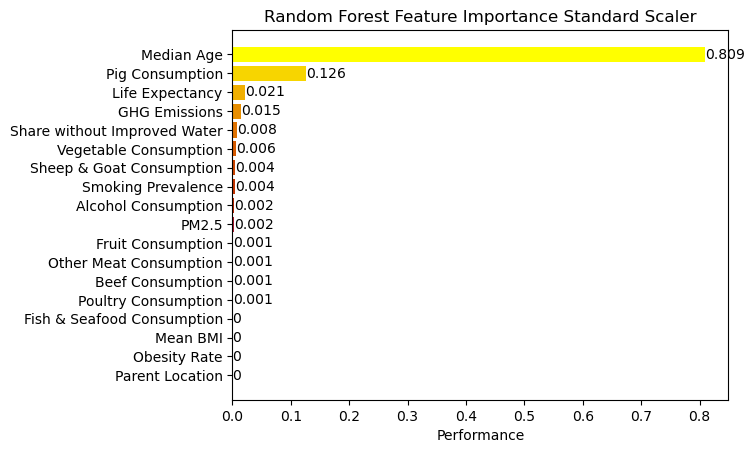

In [53]:
fi_plot(rf_model,"Random Forest")

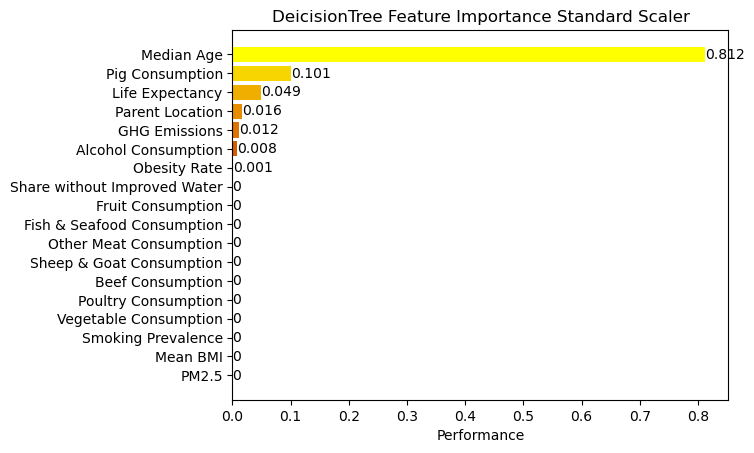

In [54]:
fi_plot(dt_model,"DeicisionTree")

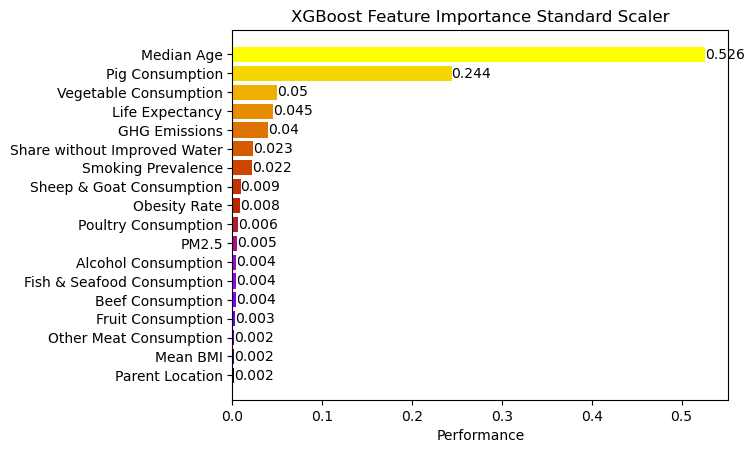

In [55]:
fi_plot(xg_model,"XGBoost")

# R-squared plot

In [56]:
# Create an empty DataFrame
RSC = pd.DataFrame(columns=["Model Name", "R-Squared Plot","Train","Test"])

In [57]:
def getSTD(prediction):
    st= []
    sb = []
    for i in prediction:
        st.append(i + np.std(prediction))
        sb.append(i - np.std(prediction))
    return st,sb

In [58]:
def r2_plot(model,X_train,X_test,y_train,y_test,title,model_id):
    plt.rcdefaults()
    predictions = model.predict(X_train)
    predictions2 = model.predict(X_test)
    r2_train = r2_score(y_train,predictions)
    r2_test = r2_score(y_test,predictions2)
    fig, ax = plt.subplots()
    plt.scatter(predictions, y_train, color ='blue',alpha=0.5,label= 'Train R-squared = {:.2%}'.format(r2_train))
    plt.scatter(predictions2, y_test, color ='green',alpha=0.5,label = 'Test R-squared = {:.2%}'.format(r2_test))
    plt.legend(loc="upper left")

    plt.plot(predictions, predictions,alpha=0.5, color = 'black')
    plt.ylabel('actual');
    plt.xlabel('prediction');
    plt.legend()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    ax.yaxis.set_major_formatter(formatter)
    st,sb = getSTD(predictions)
    st2,sb2 = getSTD(predictions2)
    ax.plot(predictions,st,linestyle='--',color='blue')
    ax.plot(predictions,sb,linestyle='--',color='blue')
    ax.plot(predictions2,st2,linestyle='--',color='green')
    ax.plot(predictions2,sb2,linestyle='--',color='green')
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0)
    #ax.fill_between(predictions,st,linestyle='--',color='blue')
    ax.set_title(title+' R-square plot ' + normMethodName)

    #aplt.xticks(ticks = df.date_ordinal[::5], labels = df.index.year[::5])
    
    plt.grid()  

    plt.show()
    plt.clf()
    
    output_path = os.path.join(subfolder_path, "Graph")
    os.makedirs(output_path, exist_ok=True)
    
    fig.savefig(os.path.join(output_path,'feature R2 Plot {}.png'.format(str(title)+'_'+date_time )), dpi=ImageQuality, bbox_inches='tight', transparent=True)
    fig.savefig(os.path.join(output_path,'feature R2 Plot {}.svg'.format(str(title)+'_'+date_time )), dpi=ImageQuality, bbox_inches='tight', transparent=True)
    
    output_path = os.path.join(subfolder_path, "R-squared plots csv")
    os.makedirs(output_path, exist_ok=True)
    
    data = predictions.tolist() + predictions2.tolist()
    train_test = (['train']*len(predictions) ) + (['test']*len(predictions2))
    r2_df = pd.DataFrame([data,train_test]).T
    r2_df.columns = ['train_or_test','predictions']
    r2_df.to_csv(os.path.join(output_path,title + ' r2plot '+f'{date_time}'+'.csv'))
    
    output_path = os.path.join(subfolder_path, "Graph")
    RSC.loc[model_id] = [title, os.path.join(output_path,'feature R2 Plot {}.png'.format(str(title) + '_' + date_time)) , r2_train , r2_test]


In [59]:
#r2_plot(xg_model,X_train,X_test,y_train,y_test,'XGBoost')

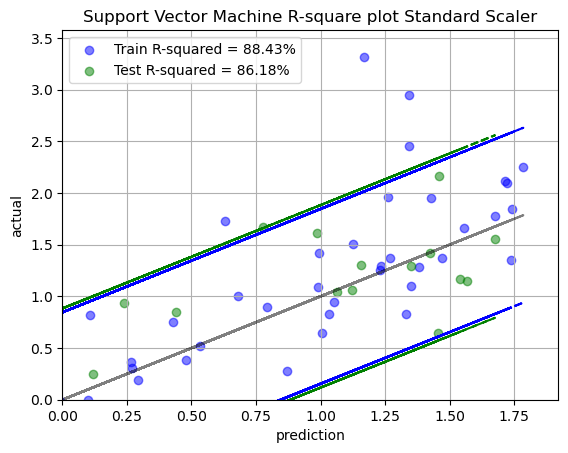

<Figure size 640x480 with 0 Axes>

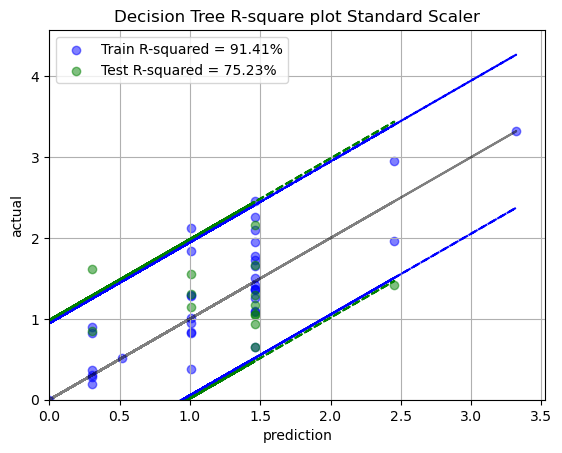

<Figure size 640x480 with 0 Axes>

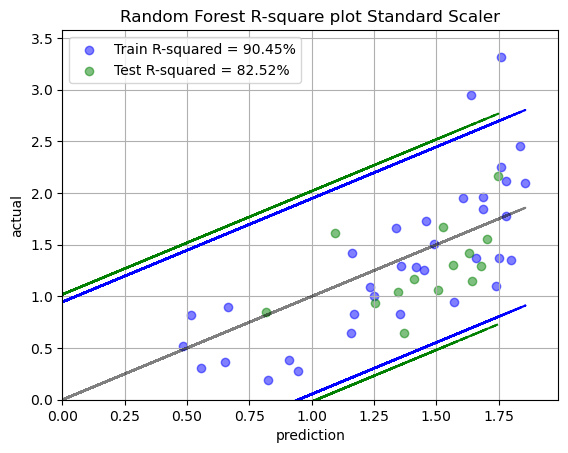

<Figure size 640x480 with 0 Axes>

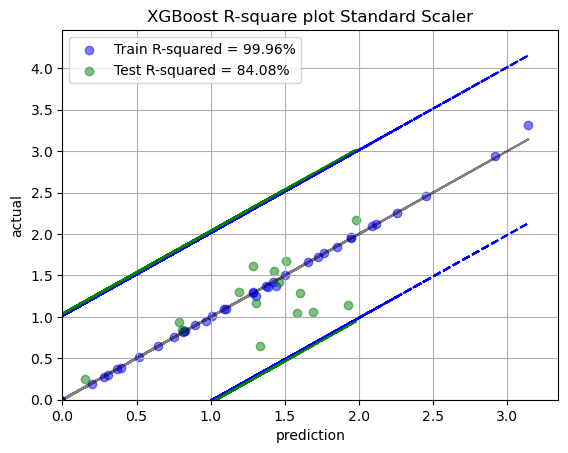

<Figure size 640x480 with 0 Axes>

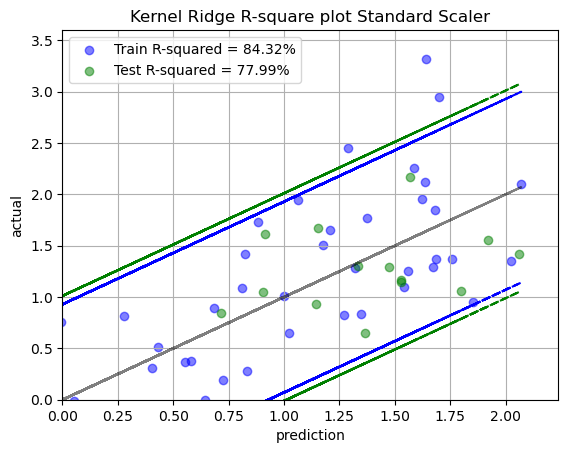

<Figure size 640x480 with 0 Axes>

In [60]:
for idx in range(len(all_model)):
    r2_plot(all_model[idx],X_train,X_test,y_train,y_test,model_name[idx],idx)

In [61]:
# Save the DataFrame to a CSV file
RSC.to_csv(os.path.join(folder_path,"R-Squared Compare.csv"), index=False)

# 1D partial

# import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

def partialValue(model,feature,X):
    pd_x_value = []
    pd_y_value =[]
    for i in range(len(X) - 1):#[i:i+1]
        y_pd = partial_dependence(model, features=feature, X=X[i:i+1], percentiles=(0, 1),grid_resolution=100) 
#         y_pd = PartialDependenceDisplay.from_estimator(model,X[i:i+1], str(feature) )
        best_params_all[0],X_train,y_train
        
        pd_y_value.append(y_pd['average'][0])
        pd_x_value.append(y_pd['values'][0])
        
#         pd_y_value.append(y_pd[0][0][0])
#         pd_x_value.append(y_pd[1][0][0])
#     print(*zip(pd_x_value,pd_y_value))
#     pd_dict = dict(zip(pd_x_value,pd_y_value))
#     new_pd_dict = dict(sorted(pd_dict.items()))
#     return new_pd_dict.keys(), new_pd_dict.values(),feature
    return pd_x_value, pd_y_value, feature

def partialValue(model, feature, X):
    y_pd = partial_dependence(model, features=feature, X=X, percentiles=(0, 1), grid_resolution=100)
    pd_x_value = y_pd[1][0][0]
    pd_y_value = y_pd[0][0][0]
    pd_dict = dict(zip(pd_x_value, pd_y_value))
    new_pd_dict = dict(sorted(pd_dict.items()))
    return new_pd_dict.keys(), new_pd_dict.values(), feature
# Delete later

pd.__version__ 

import numpy as np
import matplotlib.pyplot as plt

def get_xaxis(xaxis):
    list_xaxis = []
    for quantile in range(10):
        
        list_xaxis.append(round(np.quantile(list(xaxis),quantile/10),2))
    return list_xaxis

def plot_partial1d(model,feature1,feature2,feature3,data):
    x1,y1,f1= partialValue(model = model,feature = feature1,X=data)
    x2,y2,f2 = partialValue(model = model,feature = feature2,X=data)
    x3,y3,f3 = partialValue(model = model,feature = feature3,X=data)

    fig, ax1 = plt.subplots()
    b0 = 'black'
    one = ax1.plot(x1, y1, color = 'cyan', label = f1)
    ax1.set_xlabel('feature ' +str(f1))
    ax1.spines['bottom'].set_color(b0)
    ax1.tick_params(axis='x', colors=b0)
    ax1.xaxis.label.set_color(b0)


    ax2 = ax1.twiny()
    two = ax2.plot(x2, y2, color = 'deepskyblue', label = f2)
    ax2.set_xlabel('feature ' +str(f2))
    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('axes', -0.25))
    ax2.spines['bottom'].set_color(b0)
    ax2.tick_params(axis='x', colors=b0)
    ax2.xaxis.label.set_color(b0)


    ax3 = ax1.twiny()
    three = ax3.plot(x3, y3, color = 'mediumblue', label = f3)
    ax3.set_xlabel('feature ' +str(f3))
    ax3.xaxis.set_ticks_position('bottom')
    ax3.xaxis.set_label_position('bottom')
    ax3.spines['bottom'].set_position(('axes', -0.5))
    ax3.spines['bottom'].set_color(b0)
    ax3.tick_params(axis='x', colors=b0)
    ax3.xaxis.label.set_color(b0)


    lines = one + two + three
    labels = ['feature ' + l.get_label() for l in lines]
    ax1.legend(lines, labels,loc='upper left')
    plt.tight_layout()
    plt.show()
    
    
    
    output_path = os.path.join(subfolder_path, "Graph")
    os.makedirs(output_path, exist_ok=True)
    fig.savefig((os.path.join(output_path,'partial1d {}.png'.format(str(f1)+str(f2)+str(f3)+'_'+date_time ))), dpi=ImageQuality)
    with open('Partial'+f'{datetime.now().strftime("%H%M_%m%d%Y")}'+'.json', 'w', encoding='utf-8') as f:
        json.dump(list({'partial'+str(feature1):[x1,y1,f1],'partial'+str(feature2):[x2,y2,f2],'partial'+str(feature3):[x3,y3,f3]}), f)
    
    for feature_name in [feature1,feature2,feature3]:
        partial1d_df = pd.DataFrame(partialValue(model = model,feature = feature_name,X=data)[:2]).T
        partial1d_df.columns = [str(feature_name) +' X', str(feature_name) +' Y']
        partial1d_df.to_csv('parital1d_result'+ str(feature_name) +'.csv')
        print('export report')

def partial_1d2(model, data, features, xlim=None, ylim=None):
    print(df.columns[features])
    #features, feature_names = [(features,)], [f"Features #{i}" for i in range(X.shape[1])]
    print(df.columns[features[0][0]])
    display = PartialDependenceDisplay.from_estimator(model, data, features,n_jobs=-1, grid_resolution=100)
    print(df.columns[features[0][0]])
    display.plot()
    plt.show()
# Delete later

    color = 'tab:red'
    ax.set_xlabel('time (s)')
    ax.set_ylabel('exp', color=color)
    ax.tick_params(axis='y', labelcolor=color)

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
    ax2 = plt.gca()
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax3.set_ylabel('cos', color=color)  # we already handled the x-label with ax1
    ax3 = plt.gca()
    ax3.tick_params(axis='y', labelcolor=color)
    https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/two_scales.html
# Delete later

def partial_1d2(model, data, features,feature2,feature3, xlim=None, ylim=None):
    print('Computing partial dependence plots...')
    tic = time()
    features = [(features,)]
    feature2 = [(feature2,)]
    feature3 = [(feature3,)]
    print (features[0][0])
    display = PartialDependenceDisplay.from_estimator(model, data, features,n_jobs=-1, grid_resolution=100)
    fig = plt.gcf()
    ax1 = plt.gca()


    #plt.xlabel(getnick( df.columns[features[0]] ))
    #plt.ylabel(getnick( df.columns[features[0]] ))
    #print(ax1.get_xlim())
    #print(ax1.get_ylim())
    # Adjust scales
    if xlim != None:
        ax1.set_xlim([xlim[0], xlim[1]])
    if ylim != None:
        ax1.set_ylim([ylim[0], ylim[1]])
    
    
    plt.title('Partial dependency plot')

    #fig.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=0, hspace=0)
    #fig.subplots_adjust(wspace=0.4, hspace=0.3)
    output_path = os.path.join(subfolder_path, "Graph")
    os.makedirs(output_path, exist_ok=True)

    fig.savefig(os.path.join(output_path,'partial2d {}.png'.format(str(features)+'_'+date_time )), dpi=ImageQuality)
    print("Done in {:.3f}s".format(time() - tic))
    
    
    b0 = 'black'
    #one = ax1.plot(x1, y1, color = 'cyan', label = f1)
    ax1.set_xlabel('feature ' + df.columns[features[0][0]])
    ax1.spines['bottom'].set_color(b0)
    ax1.tick_params(axis='x', colors=b0)
    ax1.xaxis.label.set_color(b0)


    ax2 = ax1.twiny()
    #two = ax2.plot(x2, y2, color = 'deepskyblue', label = f2)
    ax2.set_xlabel('feature ' + df.columns[feature2[0][0]])
    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('axes', -0.25))
    ax2.spines['bottom'].set_color(b0)
    ax2.tick_params(axis='x', colors=b0)
    ax2.xaxis.label.set_color(b0)


    ax3 = ax1.twiny()
    #three = ax3.plot(x3, y3, color = 'mediumblue', label = f3)
    ax3.set_xlabel('feature ' + df.columns[feature3[0][0]])
    ax3.xaxis.set_ticks_position('bottom')
    ax3.xaxis.set_label_position('bottom')
    ax3.spines['bottom'].set_position(('axes', -0.5))
    ax3.spines['bottom'].set_color(b0)
    ax3.tick_params(axis='x', colors=b0)
    ax3.xaxis.label.set_color(b0)


    #lines = one + two + three
    #labels = ['feature ' + l.get_label() for l in lines]
    #ax1.legend(lines, labels,loc='upper left')
    plt.tight_layout()
    plt.show()
    
    

#partial_1d2(model = rf_model, data = X, features = (2,9), xlim = (0.11,0.14), ylim = (0,1))
partial_1d2(model = rf_model, data = X, features = 3, feature2 = 4, feature3 = 5)

plot_partial1d(rf_model,2,3,4,X)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
X, y = make_friedman1()
clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
features, feature_names = [(0,)], [f"Features #{i}" for i in range(X.shape[1])]
deciles = {0: np.linspace(0, 1, num=5)}
pd_results = partial_dependence(
    clf, X, features=0, kind="average", grid_resolution=5)
display = PartialDependenceDisplay(
    [pd_results], features=features, feature_names=feature_names,
    target_idx=0, deciles=deciles
)
display.plot(pdp_lim={1: (-1.38, 0.66)})
plt.show()
# Delete later

# 2D Partial Plot

ax1 = plt.subplot(131)
ax1.scatter([1, 2], [3, 4])
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])

In [62]:
def partial_2d(model, data, features, xlim=None, ylim=None, zoom = 0):
    #print('Computing partial dependence plots...')
    print('Computing ' + ('2D-partial dependency plot between ' + getab( df.columns[features[0][0]] ) + ' and '+ getab( df.columns[features[0][1]] )))
    tic = time()
    display = PartialDependenceDisplay.from_estimator(model, data, features,n_jobs=-1, grid_resolution=100)
    fig = plt.gcf()
    ax = plt.gca()


    plt.xlabel(getnick( df.columns[features[0][0]] ))
    plt.ylabel(getnick( df.columns[features[0][1]] ))
    
    # Adjust scales
    if(zoom):
        ax.set_xlim([xlim[0], xlim[1]])
        ax.set_ylim([ylim[0], ylim[1]])
    
    #print(ax.get_xlim())
    #print(ax.get_ylim())
    plt.title('2D-partial dependency plot between ' + getab( df.columns[features[0][0]] ) + ' and '+ getab( df.columns[features[0][1]] ))

    #fig.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=0, hspace=0)
    #fig.subplots_adjust(wspace=0.4, hspace=0.3)
    output_path = os.path.join(subfolder_path, "Graph")
    os.makedirs(output_path, exist_ok=True)
    output_path = os.path.join(output_path, "2D Partial Plot")
    os.makedirs(output_path, exist_ok=True)

    #fig.savefig(os.path.join(output_path,'partial2d ' + getab( df.columns[features[0][0]]) + ' ' + getab(df.columns[features[0][1]]) + ' '+ date_time + '.png'), dpi=ImageQuality)
    fig.savefig(os.path.join(output_path,'partial2d {}.png'.format(  getab(df.columns[features[0][0]])+ ' ' + getab( df.columns[features[0][1]]) +' '+date_time )  ), dpi=ImageQuality, transparent=True)
    fig.savefig(os.path.join(output_path,'partial2d {}.svg'.format(  getab(df.columns[features[0][0]])+ ' ' + getab( df.columns[features[0][1]]) +' '+date_time )  ), dpi=ImageQuality, transparent=True)
    #fig.savefig(os.path.join(output_path,'partial2d {}.png'.format(str(features)+'_'+date_time )), dpi=ImageQuality)
    print("Done in {:.3f}s".format(time() - tic))
    
    #plt.show()
    plt.close()
    
    

In [63]:
partial_2d(model = rf_model, data = X, features = [(0,17)], xlim = (0.11,0.14), ylim = (0,1))

Computing 2D-partial dependency plot between PL and Alcohol
Done in 4.020s


In [64]:
print(((os.path.join(subfolder_path,'partial2d ' + str(getab( df.columns[3]) + ' ' + getab(df.columns[17]) + ' '+ date_time )))))
partial_2d(model = rf_model, data = X, features = [(3,17)], xlim = (0.11,0.14), ylim = (0,1))

./Lung Estimated number of prevalent cases (1-year) as a proportion (2020)\2024-02-15__12-16-03\partial2d PM Alcohol 2024-02-15__12-16-03
Computing 2D-partial dependency plot between PM and Alcohol
Done in 1.429s


In [ ]:
for i in range(0, 18, 1):
    for j in range(i+1, 18, 1):
        partial_2d(model = rf_model, data = X, features = [(i,j)], xlim = (0.11,0.14), ylim = (0,1), zoom = 0)

Computing 2D-partial dependency plot between PL and GHG
Done in 1.340s
Computing 2D-partial dependency plot between PL and Obesity
Done in 1.414s
Computing 2D-partial dependency plot between PL and PM
Done in 1.377s
Computing 2D-partial dependency plot between PL and BMI


import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
X, y = make_friedman1()
clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)
PartialDependenceDisplay.from_estimator(clf, X, [0, (0, 1)])
plt.show()

# Load and use model

filename = 'Decision Tree_2023-11-05_17-49-01.pkl'

filename = os.path.join(subfolder_path, "ML Models", filename)

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

# Save Settings

In [ ]:
endTime = datetime.now()
time_used = endTime - startTime

In [ ]:
# Save Settings to a Text File
with open(os.path.join(subfolder_path, 'Settings.txt'), "w") as file:
    file.write(f"#range of (0,1)\n")
    file.write(f"Test_To_All = {Test_To_All}\n")
    file.write(f"#18 to 23\n")
    file.write(f"numTargetCol = {numTargetCol}\n")
    file.write(f"#Image DPI\n")
    file.write(f"ImageQuality = {ImageQuality}\n")
    file.write(f"#Normalization method: -1 for None, 0 for Max-Min Scaling, 1 for Z-Score Scaling\n")
    file.write(f"normMethod = {normMethod}\n")
    file.write(startTime.strftime("\n%A %d %B, %Y\n"))
    file.write("Started at " + startTime.strftime("%d/%m/%Y at %X\n"))
    file.write("Finished at " + endTime.strftime("%d/%m/%Y at %X\n"))
    file.write("Time used: " + str(time_used))

# Notify & time report

In [ ]:
%%notify -o
print("Started at " + startTime.strftime("%d/%m/%Y at %X"))
print("Finished at " + endTime.strftime("%d/%m/%Y at %X"))

time_used = endTime - startTime
print("Time used: " + str(time_used))


endTime.strftime("Finished building %d/%m/%Y at %X")